In [1]:
# Title of Project
# Customer Churn Prediction

In [2]:
# Objective
# The objective of this project is to predict customer churn in a bank using machine learning techniques. Churn prediction helps in identifying customers who are likely to leave the bank, allowing proactive retention strategies to be implemented.

In [3]:
# Data Source
# The dataset used for this project is sourced from a CSV file named 'Churn_Modelling.csv', which contains information about bank customers.

In [4]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


In [5]:
# Import Data
import pandas as pd
dataset = pd.read_csv('/kaggle/input/churn-modelling-csv/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Describe Data
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

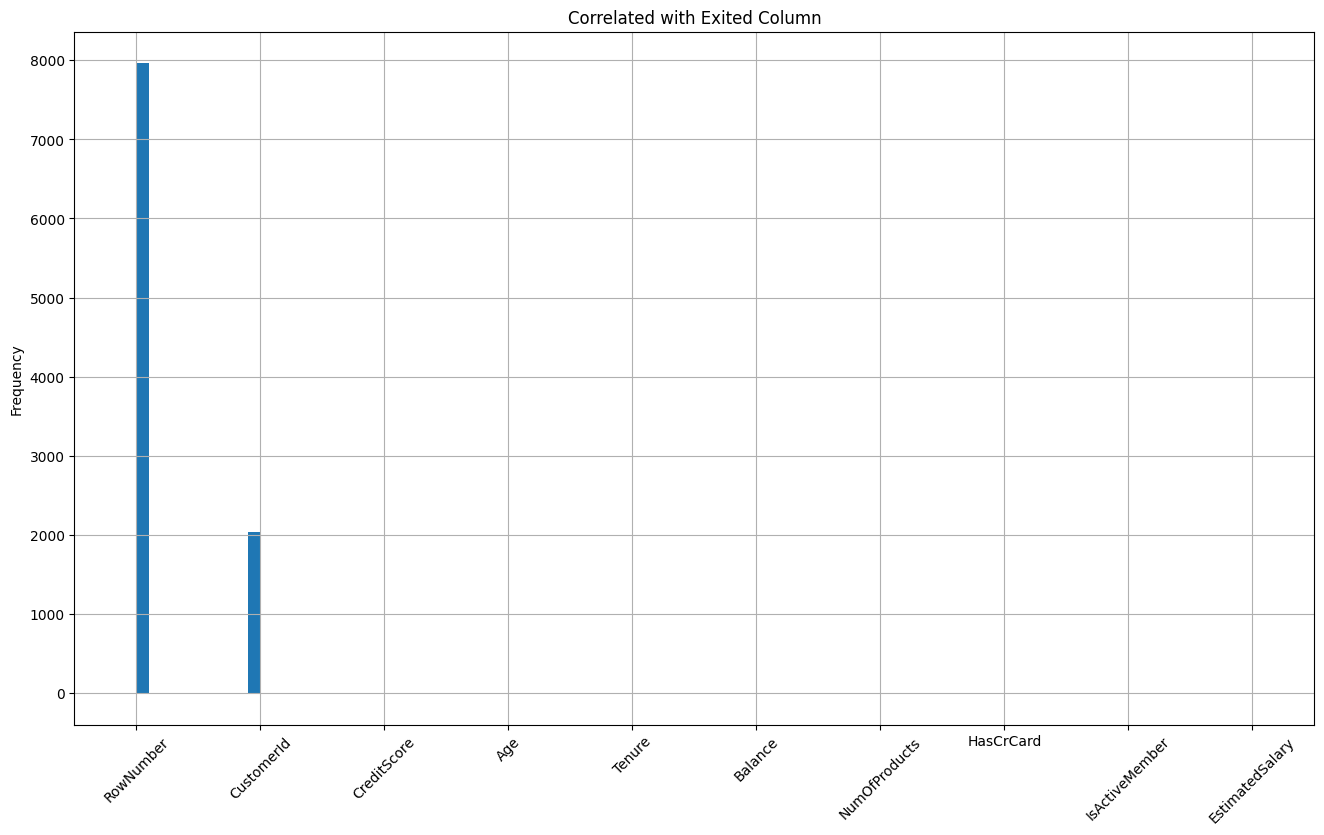

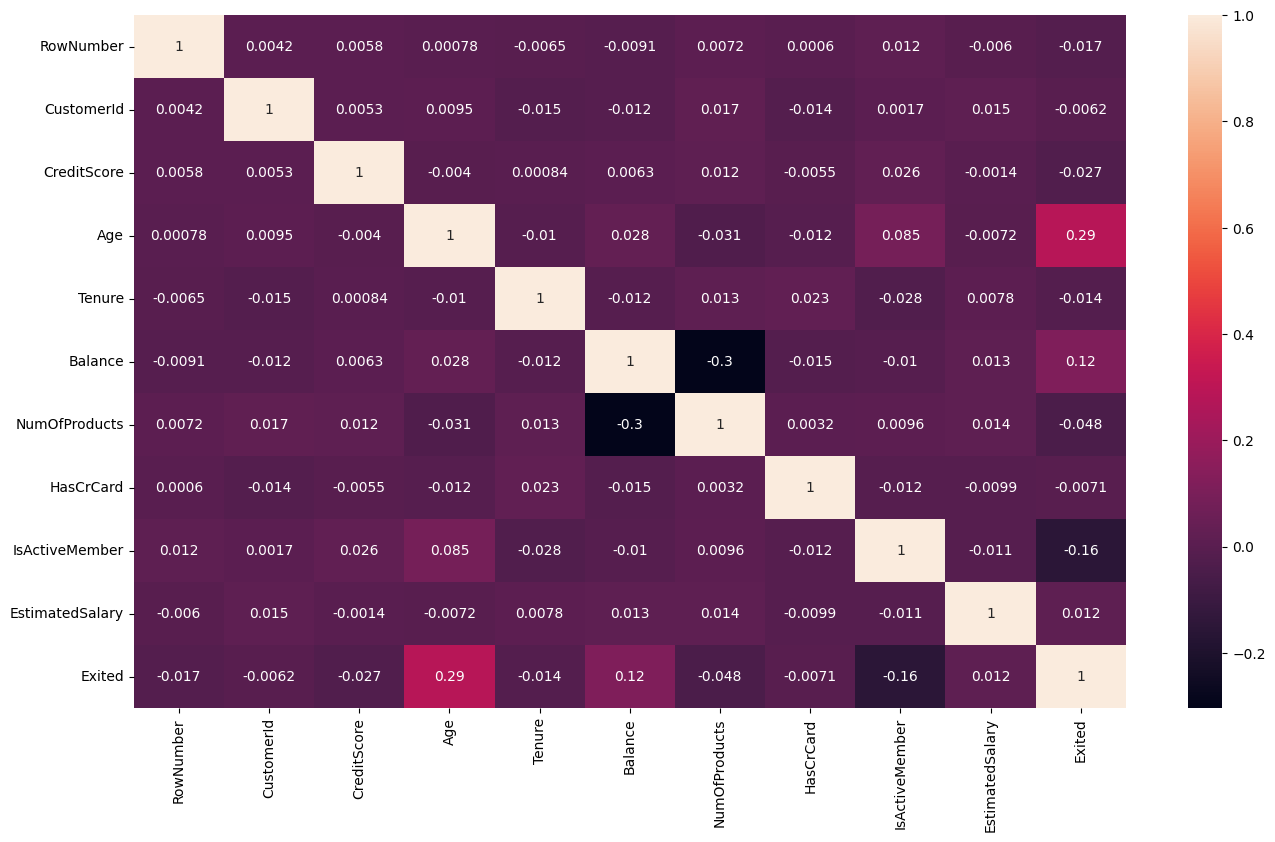

In [7]:
# Data Visualization
dataset['Exited'].plot.hist()
dataset.drop(columns='Exited').corrwith(dataset['Exited'], numeric_only=True).plot.bar(figsize=(16, 9), title='Correlated with Exited Column', rot=45, grid=True)
corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

In [8]:
# Data Preprocessing
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [9]:
# Define Target Variable (y) and Feature Variables (X)
X = dataset.drop(columns='Exited')
y = dataset['Exited']


In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
# Modeling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

# Logistic Regression Model
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)

# Random Forest Classifier Model
clf_rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


In [12]:
# Model Evaluation
# Logistic Regression Results
y_pred_lr = clf_lr.predict(X_test)
results_lr = pd.DataFrame([['Logistic regression', accuracy_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr),
                            precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr)]],
                          columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

# Random Forest Results
y_pred_rf = clf_rf.predict(X_test)
results_rf = pd.DataFrame([['Random Forest Classifier', accuracy_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf),
                            precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf)]],
                          columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

# Display Results
results_concat = pd.concat([results_lr, results_rf], ignore_index=True)
results_concat

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037
1,Random Forest Classifier,0.867,0.613372,0.745583,0.520988


In [13]:
# Prediction
single_obs = [[647, 40, 3, 85000.45, 2, 0, 0, 92012.45, 0, 1, 1]]
prediction = clf_rf.predict(scaler.fit_transform(single_obs))
print(prediction)

[0]


In [14]:
# Explanation
"""The project involves predicting customer churn in a bank using two models: Logistic Regression and Random Forest Classifier. The dataset is preprocessed, features are scaled, and models are trained. Evaluation metrics such as accuracy, F1 score, precision, and recall are calculated for both models. Finally, the trained Random Forest model is used to predict churn for a new observation."""

'The project involves predicting customer churn in a bank using two models: Logistic Regression and Random Forest Classifier. The dataset is preprocessed, features are scaled, and models are trained. Evaluation metrics such as accuracy, F1 score, precision, and recall are calculated for both models. Finally, the trained Random Forest model is used to predict churn for a new observation.'